In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools, places,geo_tools, bloomdrivers as bd, evaltools as et
import xarray as xr
import datetime as dt
%matplotlib inline

In [2]:
# get grid corners (use 2015, pre Sept 22, 2011 and post Sept 22 2011 files)

<class 'netCDF4._netCDF4.Variable'>
float32 u_wind(time_counter, y, x)
    _FillValue: nan
    level: 10 m above surface
    long_name: U-Component of Wind
    standard_name: x_wind
    units: m/s
    ioos_category: wind speed and direction
unlimited dimensions: time_counter
current shape = (24, 266, 256)
filling on


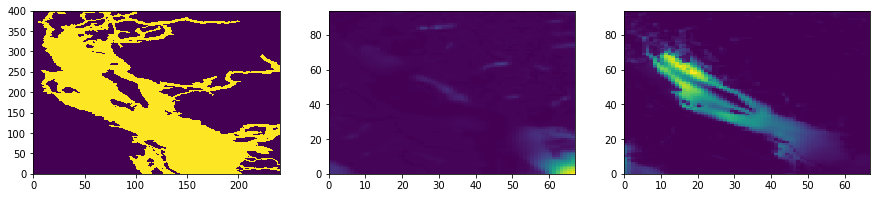

In [3]:
fig,ax=plt.subplots(1,3,figsize=(15,3))
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc') as mesh:
    navlon=mesh.variables['nav_lon'][:,:]
    navlat=mesh.variables['nav_lat'][:,:]
    tmask=mesh.variables['tmask'][0,:,:,:]
    ax[0].pcolormesh(mesh.variables['tmask'][0,0,400:800,110:350])
with nc.Dataset('/results/forcing/atmospheric/GEM2.5/operational/ops_y2015m03d01.nc') as g:
    ops_lon=g.variables['nav_lon'][:,:]
    ops_lat=g.variables['nav_lat'][:,:]
    ax[1].pcolormesh((g.variables['u_wind'][0,119:213,96:163]**2+\
                      g.variables['v_wind'][0,119:213,96:163]**2)**(3/2))
    #.pcolormesh(g.variables[])
with nc.Dataset('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2011m09d21.nc') as g: 
    gl1_lon=g.variables['nav_lon'][:,:]
    gl1_lat=g.variables['nav_lat'][:,:]
    ax[2].pcolormesh((g.variables['u_wind'][0,119:213,96:163]**2+\
                      g.variables['v_wind'][0,119:213,96:163]**2)**(3/2))
with nc.Dataset('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2011m09d22.nc') as g: 
    gl2_lon=g.variables['nav_lon'][:,:]
    gl2_lat=g.variables['nav_lat'][:,:]
    ax[2].pcolormesh((g.variables['u_wind'][0,119:213,96:163]**2+\
                      g.variables['v_wind'][0,119:213,96:163]**2)**(3/2))
    print(g.variables['u_wind'])

In [4]:
ll_lon=navlon[400,110]
lr_lon=navlon[400,350]
ul_lon=navlon[800,110]
ur_lon=navlon[800,350]
ll_lat=navlat[400,110]
lr_lat=navlat[400,350]
ul_lat=navlat[800,110]
ur_lat=navlat[800,350]

In [5]:
(ll_j_ops,ll_i_ops)=geo_tools.find_closest_model_point(ll_lon,ll_lat,ops_lon-360,ops_lat,grid='GEM2.5')
(lr_j_ops,lr_i_ops)=geo_tools.find_closest_model_point(lr_lon,lr_lat,ops_lon-360,ops_lat,grid='GEM2.5')
(ul_j_ops,ul_i_ops)=geo_tools.find_closest_model_point(ul_lon,ul_lat,ops_lon-360,ops_lat,grid='GEM2.5')
(ur_j_ops,ur_i_ops)=geo_tools.find_closest_model_point(ur_lon,ur_lat,ops_lon-360,ops_lat,grid='GEM2.5')
print((ll_j_ops,ll_i_ops),(lr_j_ops,lr_i_ops),(ul_j_ops,ul_i_ops),(ur_j_ops,ur_i_ops))

(119, 121) (134, 163) (200, 96) (213, 136)


In [6]:
(ll_j_gl1,ll_i_gl1)=geo_tools.find_closest_model_point(ll_lon,ll_lat,gl1_lon-360,gl1_lat,grid='GEM2.5')
(lr_j_gl1,lr_i_gl1)=geo_tools.find_closest_model_point(lr_lon,lr_lat,gl1_lon-360,gl2_lat,grid='GEM2.5')
(ul_j_gl1,ul_i_gl1)=geo_tools.find_closest_model_point(ul_lon,ul_lat,gl1_lon-360,gl1_lat,grid='GEM2.5')
(ur_j_gl1,ur_i_gl1)=geo_tools.find_closest_model_point(ur_lon,ur_lat,gl1_lon-360,gl1_lat,grid='GEM2.5')
print((ll_j_gl1,ll_i_gl1),(lr_j_gl1,lr_i_gl1),(ul_j_gl1,ul_i_gl1),(ur_j_gl1,ur_i_gl1))

(114, 121) (132, 161) (189, 96) (202, 134)


In [7]:
(ll_j_gl2,ll_i_gl2)=geo_tools.find_closest_model_point(ll_lon,ll_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
(lr_j_gl2,lr_i_gl2)=geo_tools.find_closest_model_point(lr_lon,lr_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
(ul_j_gl2,ul_i_gl2)=geo_tools.find_closest_model_point(ul_lon,ul_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
(ur_j_gl2,ur_i_gl2)=geo_tools.find_closest_model_point(ur_lon,ur_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
print((ll_j_gl2,ll_i_gl2),(lr_j_gl2,lr_i_gl2),(ul_j_gl2,ul_i_gl2),(ur_j_gl2,ur_i_gl2))

(117, 124) (131, 163) (193, 99) (205, 137)


In [8]:
# ops: use j: 119:213, i: 96:163
# gl1: use j: 114:202, i: 96:161
# gl2: use j: 117:205, i: 99:163

In [9]:
def getWindVars(day):
    if day>dt.datetime(2014,12,1): #or day.year>2014
        opsdir='/results/forcing/atmospheric/GEM2.5/operational/'
        nam_fmt='ops'
        jlims=(119,213)
        ilims=(96,163)
    elif day<dt.datetime(2011,9,22):
        opsdir='/results/forcing/atmospheric/GEM2.5/gemlam'
        nam_fmt='gemlam'
        jlims=(114,202)
        ilims=(96,161)
    else:
        opsdir='/results/forcing/atmospheric/GEM2.5/gemlam'
        nam_fmt='gemlam'
        jlims=(117,205)
        ilims=(99,163)
    return opsdir, nam_fmt, jlims,ilims

<ipython-input-10-bcc7bbeb2c78>:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(navlon[350:850,100:398],navlat[350:850,100:398],tmask[0,350:850,100:398],shading='auto')


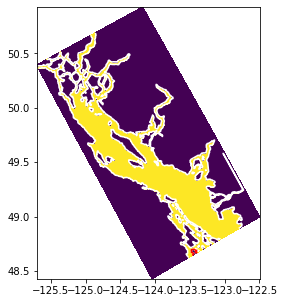

In [10]:
fig,ax=plt.subplots(1,1,figsize=(4,5))
ax.pcolormesh(navlon[350:850,100:398],navlat[350:850,100:398],tmask[0,350:850,100:398],shading='auto')
cl=ax.contour(navlon[350:850,100:398],navlat[350:850,100:398],tmask[0,350:850,100:398],[.5],colors='w')
plt.plot(cl.allsegs[0][0][:,0],cl.allsegs[0][0][:,1],'r-')

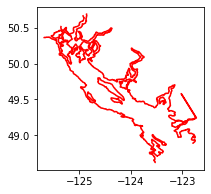

In [11]:
fig,ax=plt.subplots(1,1,figsize=(3,3))
lens=list()
modlines=list()
for ii in range(0,len(cl.allsegs[0])):
    lens.append(len(cl.allsegs[0][ii][:,1]))
    #if np.min(cl.allsegs[0][ii][:,1])<49.2 and np.max(cl.allsegs[0][ii][:,1])>50:
    if len(cl.allsegs[0][ii][:,1])>100:
        #print(ii)
        ax.plot(cl.allsegs[0][ii][:,0],cl.allsegs[0][ii][:,1],'r-')
        modlines.append((cl.allsegs[0][ii][:,0],cl.allsegs[0][ii][:,1]))

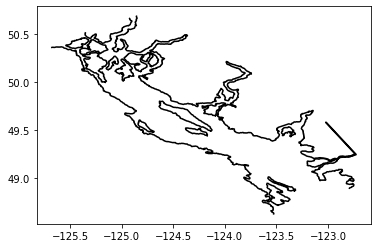

In [12]:
for (lons,lats) in modlines:
    plt.plot(lons,lats,'k-')

In [13]:
opslines=list()
for (lons,lats) in modlines:
    x=np.array([geo_tools.find_closest_model_point(lon,lat,ops_lon-360,ops_lat,grid='GEM2.5') \
                for lat, lon in zip(lats,lons)])
    opslines.append((x[:,0],x[:,1]))

In [14]:
gl1lines=list()
for (lons,lats) in modlines:
    x=np.array([geo_tools.find_closest_model_point(lon,lat,gl1_lon-360,gl1_lat,grid='GEM2.5') \
                for lat, lon in zip(lats,lons)])
    gl1lines.append((x[:,0],x[:,1]))

In [15]:
gl2lines=list()
for (lons,lats) in modlines:
    x=np.array([geo_tools.find_closest_model_point(lon,lat,gl2_lon-360,gl2_lat,grid='GEM2.5') \
                for lat, lon in zip(lats,lons)])
    gl2lines.append((x[:,0],x[:,1]))

In [16]:
# extract march mean wind from one of each type of file:
## ops, 2015
year=2015
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
U3ops=(fu**2+fv**2)**(3/2)
U3opsmean=np.mean(U3ops,0)

## gl1, 2007
year=2007
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
U3gl1=(fu**2+fv**2)**(3/2)
U3gl1mean=np.mean(U3gl1,0)

## gl2, 2012
year=2012
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
U3gl2=(fu**2+fv**2)**(3/2)
U3gl2mean=np.mean(U3gl2,0)

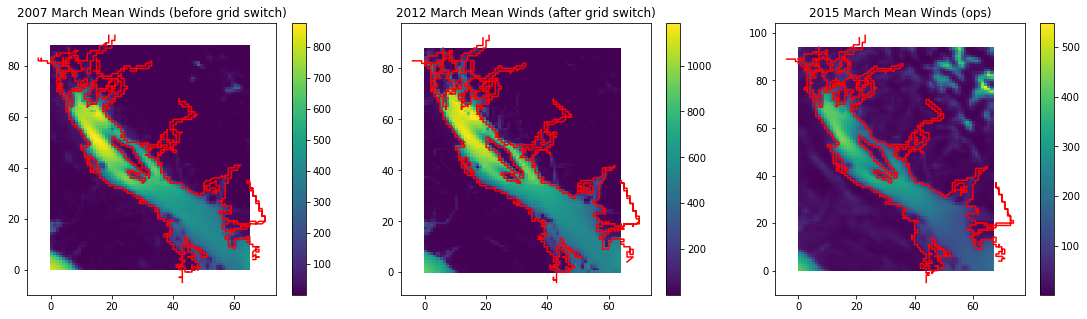

In [18]:
fig,ax=plt.subplots(1,3,figsize=(19,5))


iax=ax[0]
iax.set_title('2007 March Mean Winds (before grid switch)')
m=iax.pcolormesh(U3gl1mean)
fig.colorbar(m,ax=iax)
for (jj,ii) in gl1lines:
    iax.plot(ii-96,jj-114,'r-')

iax=ax[1]
iax.set_title('2012 March Mean Winds (after grid switch)')
m=iax.pcolormesh(U3gl2mean)
fig.colorbar(m,ax=iax)
for (jj,ii) in gl2lines:
    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[2]
iax.set_title('2015 March Mean Winds (ops)')
m=iax.pcolormesh(U3opsmean)
fig.colorbar(m,ax=iax)
for (jj,ii) in opslines:
    iax.plot(ii-96,jj-119,'r-')


In [19]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_gl12007=(fu**2+fv**2)**(3/2)
feb_gl12007mean=np.mean(feb_gl12007,0)


year=2008
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,29),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_gl12008=(fu**2+fv**2)**(3/2)
feb_gl12008mean=np.mean(feb_gl12008,0)


year=2009
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_gl12009=(fu**2+fv**2)**(3/2)
feb_gl12009mean=np.mean(feb_gl12009,0)


year=2010
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_gl12010=(fu**2+fv**2)**(3/2)
feb_gl12010mean=np.mean(feb_gl12010,0)


year=2011
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_gl12011=(fu**2+fv**2)**(3/2)
feb_gl12011mean=np.mean(feb_gl12011,0)


year=2012
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,29),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_gl22012=(fu**2+fv**2)**(3/2)
feb_gl22012mean=np.mean(feb_gl22012,0)


year=2013
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_gl22013=(fu**2+fv**2)**(3/2)
feb_gl22013mean=np.mean(feb_gl22013,0)


year=2014
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_gl22014=(fu**2+fv**2)**(3/2)
feb_gl22014mean=np.mean(feb_gl22014,0)


year=2015
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ops2015=(fu**2+fv**2)**(3/2)
feb_ops2015mean=np.mean(feb_ops2015,0)


year=2016
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,29),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ops2016=(fu**2+fv**2)**(3/2)
feb_ops2016mean=np.mean(feb_ops2016,0)


year=2017
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ops2017=(fu**2+fv**2)**(3/2)
feb_ops2017mean=np.mean(feb_ops2017,0)


year=2018
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ops2018=(fu**2+fv**2)**(3/2)
feb_ops2018mean=np.mean(feb_ops2018,0)


year=2019
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ops2019=(fu**2+fv**2)**(3/2)
feb_ops2019mean=np.mean(feb_ops2019,0)


year=2020
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,29),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ops2020=(fu**2+fv**2)**(3/2)
feb_ops2020mean=np.mean(feb_ops2020,0)

In [22]:

np.nanmean(feb_ops2019mean)

122.67487

Text(0.5, 0.98, 'February Mean Wind Speed')

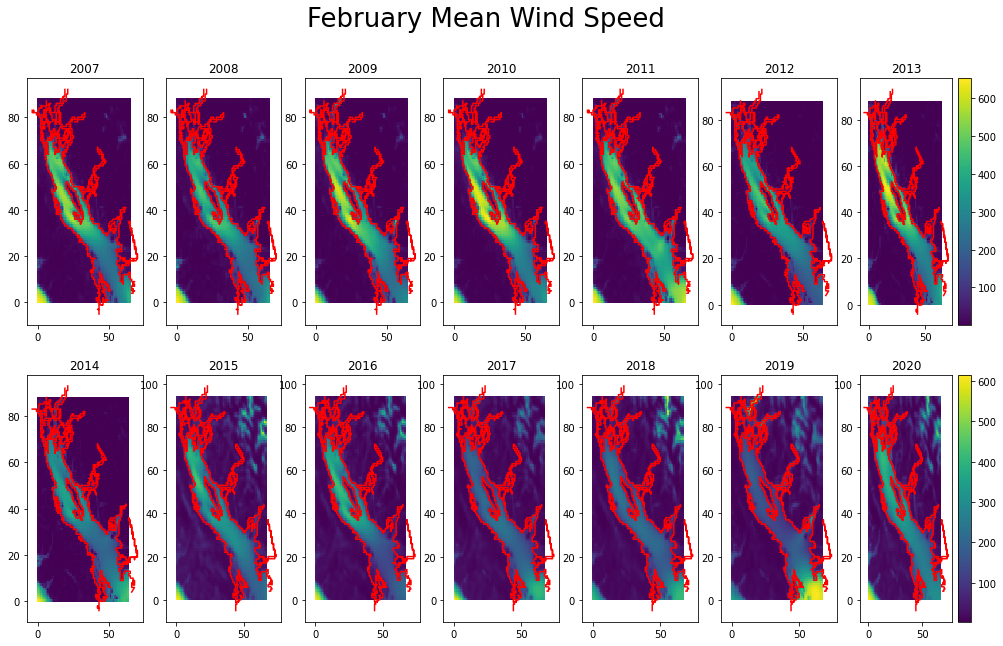

In [25]:
### February winds
fig,ax=plt.subplots(2,7,figsize=(17,10))


iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(feb_gl12007mean)
#fig.colorbar(m,ax=iax)
for (jj,ii) in gl1lines:
    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(feb_gl12008mean)
#fig.colorbar(m,ax=iax)
for (jj,ii) in gl1lines:
    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(feb_gl12009mean)
#fig.colorbar(m,ax=iax)
for (jj,ii) in gl1lines:
    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(feb_gl12010mean)
#fig.colorbar(m,ax=iax)
for (jj,ii) in gl1lines:
    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(feb_gl12011mean)
#fig.colorbar(m,ax=iax)
for (jj,ii) in gl1lines:
    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(feb_gl22012mean)
#fig.colorbar(m,ax=iax)
for (jj,ii) in gl2lines:
    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(feb_gl22013mean)
fig.colorbar(m,ax=iax)
for (jj,ii) in gl2lines:
    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(feb_gl22014mean)
#fig.colorbar(m,ax=iax)
for (jj,ii) in gl2lines:
    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(feb_ops2015mean)
#fig.colorbar(m,ax=iax)
for (jj,ii) in opslines:
    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(feb_ops2016mean)
#fig.colorbar(m,ax=iax)
for (jj,ii) in opslines:
    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(feb_ops2017mean)
#fig.colorbar(m,ax=iax)
for (jj,ii) in opslines:
    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(feb_ops2018mean)
#fig.colorbar(m,ax=iax)
for (jj,ii) in opslines:
    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(feb_ops2019mean)
#fig.colorbar(m,ax=iax)
for (jj,ii) in opslines:
    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(feb_ops2020mean)
fig.colorbar(m,ax=iax)
for (jj,ii) in opslines:
    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('February Mean Wind Speed',fontsize=26)

In [21]:
# extract march mean wind from one of each type of file:

## gl1, 2007
year=2007
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
gl12007=(fu**2+fv**2)**(3/2)
margl12007mean=np.mean(gl12007,0)

## gl1, 2008
year=2008
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
gl12008=(fu**2+fv**2)**(3/2)
margl12008mean=np.mean(gl12008,0)

## gl1, 2007
year=2009
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
gl12009=(fu**2+fv**2)**(3/2)
margl12009mean=np.mean(gl12009,0)

## gl1, 2007
year=2010
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
gl12010=(fu**2+fv**2)**(3/2)
margl12010mean=np.mean(gl12010,0)

## gl1, 2007
year=2011
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
gl12011=(fu**2+fv**2)**(3/2)
margl12011mean=np.mean(gl12011,0)

## gl1, 2007
year=2012
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
gl22012=(fu**2+fv**2)**(3/2)
margl22012mean=np.mean(gl22012,0)

## gl1, 2007
year=2013
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
gl22013=(fu**2+fv**2)**(3/2)
margl22013mean=np.mean(gl22013,0)

## gl1, 2007
year=2014
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
gl22014=(fu**2+fv**2)**(3/2)
margl22014mean=np.mean(gl22014,0)

## gl1, 2007
year=2015
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
ops2015=(fu**2+fv**2)**(3/2)
marops2015mean=np.mean(ops2015,0)

## ops, 2015
year=2016
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
ops2016=(fu**2+fv**2)**(3/2)
marops2016mean=np.mean(ops2016,0)

## gl1, 2007
year=2017
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
ops2017=(fu**2+fv**2)**(3/2)
marops2017mean=np.mean(ops2017,0)

## gl1, 2007
year=2018
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
ops2018=(fu**2+fv**2)**(3/2)
marops2018mean=np.mean(ops2018,0)

## gl1, 2007
year=2019
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
ops2019=(fu**2+fv**2)**(3/2)
marops2019mean=np.mean(ops2019,0)

## gl1, 2007
year=2020
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
ops2020=(fu**2+fv**2)**(3/2)
marops2020mean=np.mean(ops2020,0)


Text(0.5, 0.98, 'March Mean Wind Speed')

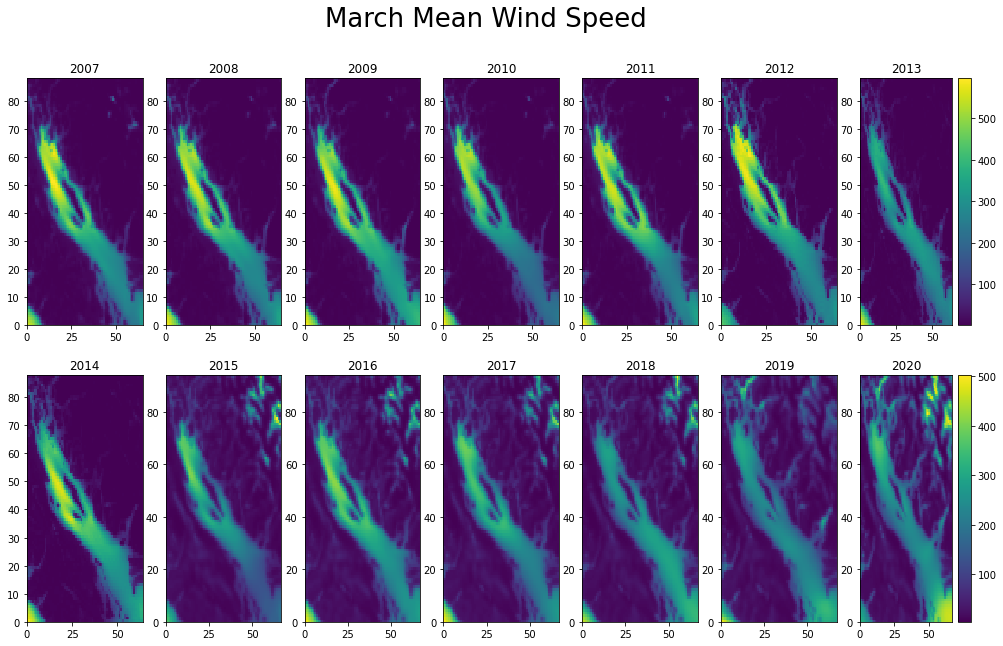

In [22]:
### March winds
fig,ax=plt.subplots(2,7,figsize=(17,10))


iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(margl12007mean)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(margl12008mean)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(margl12009mean)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(margl12010mean)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(margl12011mean)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(margl22012mean)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(margl22013mean)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(margl22014mean)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(marops2015mean)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(marops2016mean)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(marops2017mean)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(marops2018mean)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(marops2019mean)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(marops2020mean)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('March Mean Wind Speed',fontsize=26)

#### There's something wrong with the 2014 grid - check this
#### Fixed by switching the 2014 files to gl2 (grid switch to ops occurred in 12/01/2014 - confirm this).

In [23]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
gl12007=(fu**2+fv**2)**(3/2)
aprgl12007mean=np.mean(gl12007,0)


year=2008
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
gl12008=(fu**2+fv**2)**(3/2)
aprgl12008mean=np.mean(gl12008,0)


year=2009
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
gl12009=(fu**2+fv**2)**(3/2)
aprgl12009mean=np.mean(gl12009,0)


year=2010
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
gl12010=(fu**2+fv**2)**(3/2)
aprgl12010mean=np.mean(gl12010,0)


year=2011
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
gl12011=(fu**2+fv**2)**(3/2)
aprgl12011mean=np.mean(gl12011,0)


year=2012
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
gl22012=(fu**2+fv**2)**(3/2)
aprgl22012mean=np.mean(gl22012,0)


year=2013
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
gl22013=(fu**2+fv**2)**(3/2)
aprgl22013mean=np.mean(gl22013,0)


year=2014
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
gl22014=(fu**2+fv**2)**(3/2)
aprgl22014mean=np.mean(gl22014,0)


year=2015
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
ops2015=(fu**2+fv**2)**(3/2)
aprops2015mean=np.mean(ops2015,0)


year=2016
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
ops2016=(fu**2+fv**2)**(3/2)
aprops2016mean=np.mean(ops2016,0)


year=2017
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
ops2017=(fu**2+fv**2)**(3/2)
aprops2017mean=np.mean(ops2017,0)


year=2018
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
ops2018=(fu**2+fv**2)**(3/2)
aprops2018mean=np.mean(ops2018,0)


year=2019
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
ops2019=(fu**2+fv**2)**(3/2)
aprops2019mean=np.mean(ops2019,0)


year=2020
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
ops2020=(fu**2+fv**2)**(3/2)
aprops2020mean=np.mean(ops2020,0)

Text(0.5, 0.98, 'April Mean Wind Speed')

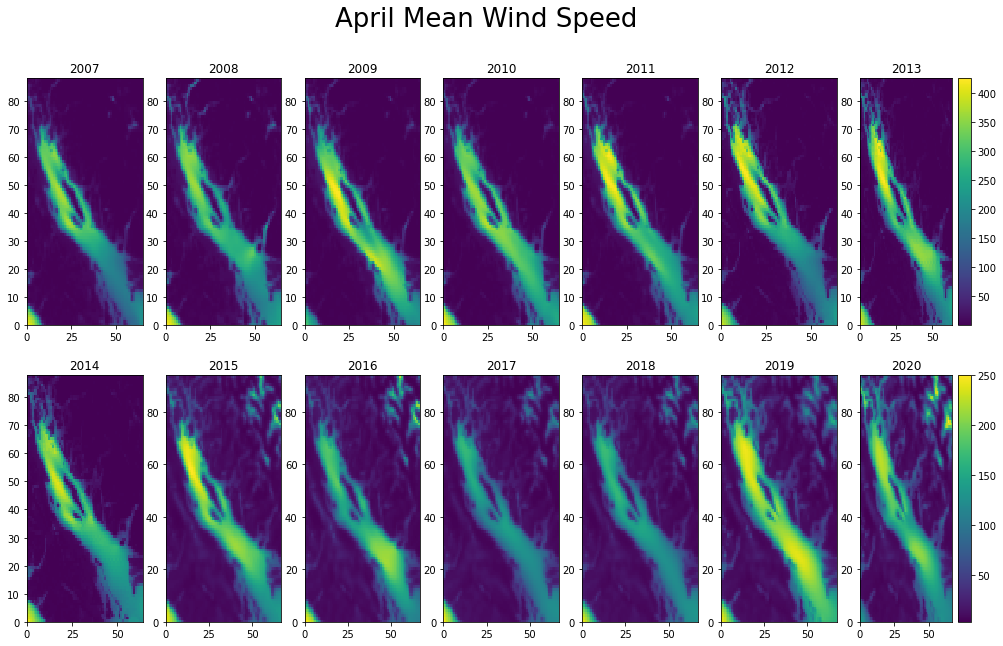

In [24]:
### April winds
fig,ax=plt.subplots(2,7,figsize=(17,10))


iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(aprgl12007mean)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(aprgl12008mean)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(aprgl12009mean)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(aprgl12010mean)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(aprgl12011mean)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(aprgl22012mean)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(aprgl22013mean)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(aprgl22014mean)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(aprops2015mean)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(aprops2016mean)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(aprops2017mean)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(aprops2018mean)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(aprops2019mean)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(aprops2020mean)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('April Mean Wind Speed',fontsize=26)